# KDD Cup: predicting customer behavior

The task is to estimate the churn, appetency and up-selling probability of customers, hence there are three target values to be predicted. The challenge is staged in phases to test the rapidity with which each team is able to produce results. A large number of variables (15,000) is made available for prediction. However, to engage participants having access to less computing power, a smaller version of the dataset with only 230 variables will be made available in the second part of the challenge.

<img src='https://cdn.livechatinc.com/website/uploads/2016/04/customer-churn@2x.jpg' style="width:400px;"/>

In [76]:
#Dowloading Data
##Features

#!wget -O ./data/orange_small_train.zip http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train.data.zip
#!wget -O ./data/orange_small_test.zip http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_test.data.zip

## Targets 
#!wget -O ./data/appentency_train http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_appetency.labels
#!wget -O ./data/churn_train http://www.kdd.org/cupfiles/KDDCupData/2009/files/orange_small_train_churn.labels
#!wget -O ./data/train_upselling http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_upselling.labels

#!unzip ./data/orange_small_test.zip -d ./data/
#!unzip ./data/orange_small_train.zip  -d ./data/


In [598]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Data
X  = pd.read_table('./data/orange_small_train.data', delimiter='\t', header=0)
y1 = pd.read_table('./data/orange_small_train_churn.labels', names=['Churn'])
y2 = pd.read_table('./data/appentency_train', names=['Appetency'])
y3 = pd.read_table('./data/train_upselling', names=['Upselling'])


### About Data
* The first 190 variables are numerical and the last 40 are categorical.

In [613]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


## Preprocessing

* Missing data seems to be a problem

***Lets explore!***



In [614]:
def percentual (percentual, total):
    percentual = (percentual/100)*total
    return percentual
def countNAratio(pd_dataframe, inicial, final):
        n_rows = pd_dataframe.shape[0]
        p_inicial = percentual(inicial,n_rows)
        p_final   = percentual(final,n_rows)
        col_with_na =  (pd_dataframe.isna().sum() >= p_inicial) & (pd_dataframe.isna().sum() <= p_final)
        return col_with_na.sum()

missing_num = []
missing_cat = []

range_ = [
         {'inicial':0, 'final':10},
         {'inicial':11, 'final':20},
         {'inicial':21, 'final':30},
         {'inicial':31, 'final':40},
         {'inicial':41, 'final':50},
         {'inicial':51, 'final':60},
         {'inicial':61, 'final':70},
         {'inicial':71, 'final':80},
         {'inicial':81, 'final':90},
         {'inicial':91, 'final':95},
         {'inicial':96, 'final':100}]

#for p in np.arange(10,110,10, dtype=int):
for p in range(0,len(range_)):
     missing_num.append({'Percentual':str(range_[p]['inicial'])+'% - '+str(range_[p]['final']) + '%',
                     'Qt_Numericas':countNAratio(X.loc[:,'Var1':'Var190'],range_[p]['inicial'],range_[p]['final'])})
for p in range(0,len(range_)):
     missing_cat.append({'Percentual':str(range_[p]['inicial'])+'% - '+str(range_[p]['final']) + '%',
                     'Qt_Categoticas':countNAratio(X.loc[:,'Var190':],range_[p]['inicial'],range_[p]['final'])})

df_missing_num = pd.DataFrame(missing_num)
df_missing_cat = pd.DataFrame(missing_cat)
df_missing_num.merge(df_missing_cat, on='Percentual')


,Percentual,Qt_Numericas,Qt_Categoticas
0,0% - 10%,3,25
1,11% - 20%,14,1
2,21% - 30%,1,0
3,31% - 40%,0,0
4,41% - 50%,2,0
5,51% - 60%,1,2
6,61% - 70%,0,0
7,71% - 80%,0,2
8,81% - 90%,0,0
9,91% - 95%,1,0


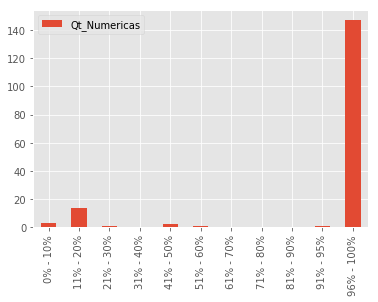

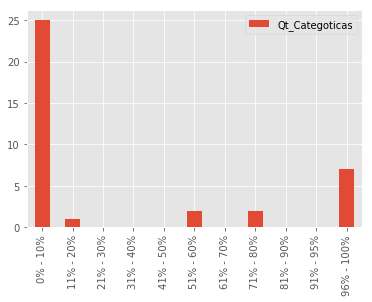

In [615]:
%matplotlib inline
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
df_missing_num.plot.bar(ax=ax)
df_missing_cat.plot.bar(ax=ax2)
ax.set_xticklabels(list(df_missing_num['Percentual']))
ax2.set_xticklabels(list(df_missing_num['Percentual']))
print()

In [616]:
def columnsNAratio(pd_dataframe, inicial, final):
        n_rows = pd_dataframe.shape[0]
        p_inicial = percentual(inicial,n_rows)
        p_final   = percentual(final,n_rows)
        col_with_na =  (pd_dataframe.isna().sum() >= p_inicial) & (pd_dataframe.isna().sum() <= p_final)
        return (col_with_na.loc[col_with_na == True]).index.values
colunas_na = columnsNAratio(X, 100,100)

In [624]:
variaveis = ' '.join(colunas_na)
total = colunas_na.size
print (
 """
 As seguintes variáveis possuem somente valores nulos e serão excluídas do DataFrame ({total} ao todo):
  
 {variaveis}
 """.format(variaveis=variaveis, total=total))


 As seguintes variáveis possuem somente valores nulos e serão excluídas do DataFrame (18 ao todo):
  
 Var8 Var15 Var20 Var31 Var32 Var39 Var42 Var48 Var52 Var55 Var79 Var141 Var167 Var169 Var175 Var185 Var209 Var230
 


In [848]:
# Processing categorical variables
categoricas = pd.DataFrame(X.drop(colunas_na, axis=1).loc[:,'Var191':])

categoricas_describe = categoricas.describe().T
categoricas_describe['Qtd %'] = (categoricas.isna().sum()*100)/50000
categoricas_describe['Qtd']   = categoricas.isna().sum()
categoricas_describe['Top %'] = (categoricas_describe['freq']*100)/50000

#Some columns still remain with a high proportion of null values or unique values (>95%),
# hence they will be excluded from model.

#categoricas = categoricas.loc[:,(categoricas_describe['Qtd %'] < 95)]
#categoricas = categoricas.loc[:,(categoricas_describe['Top %'] < 95)]

categoricas_describe = categoricas.describe().T
categoricas_describe['Qtd %'] = (categoricas.isna().sum()*100)/50000
categoricas_describe['Qtd']   = categoricas.isna().sum()
categoricas_describe['Top %'] = (categoricas_describe['freq']*100)/50000

categoricas_describe

,count,unique,top,freq,Qtd %,Qtd,Top %
Var191,1083,1,r__I,1083,97.834,48917,2.166
Var192,49631,361,qFpmfo8zhV,385,0.738,369,0.77
Var193,50000,51,RO12,35964,0.000,0,71.928
Var194,12784,3,SEuy,12567,74.432,37216,25.134
Var195,50000,23,taul,47958,0.000,0,95.916
Var196,50000,4,1K8T,49550,0.000,0,99.1
Var197,49857,225,0Xwj,4629,0.286,143,9.258
Var198,50000,4291,fhk21Ss,4441,0.000,0,8.882
Var199,49996,5073,r83_sZi,955,0.008,4,1.91
Var200,24592,15415,yP09M03,73,50.816,25408,0.146


In [849]:
# Vectorizing strings.
## In order to not add many more variables, I will get the top 10 values, and vectorize them

for i in categoricas_describe.index:
        top10=categoricas[i].value_counts()[:10,].index.values
        categoricas.loc[~categoricas[i].isin(top10),i] = 'Nulo'

In [633]:
from sklearn.feature_extraction import DictVectorizer
vec= DictVectorizer(dtype=int, sparse=False)
x_cat = vec.fit_transform(categoricas.to_dict('records'))
X_categoricas = pd.DataFrame(data=x_cat[0:,0:], columns=vec.feature_names_)



In [634]:
X_categoricas.head()

,Var192=1GdOj1KXzC,Var192=2jirEyXktW,Var192=75lr4RXktW,Var192=8I1r4RXXnK,Var192=CxSr4RXktW,Var192=DHeq9ayfAo,Var192=HYTrjIK12c,Var192=Nulo,Var192=qFpmfo8zhV,Var192=vAsgUHXM47,...,Var228=TCU50_Yjmm6GIBZ0lL_,Var228=Zy3gnGM,Var228=ib5G6X1eUxUn6,Var228=iyHGyLCEkQ,Var228=xwM2aC7IdeMC0,Var229=Nulo,Var229=am7c,Var229=mj86,Var229=oJmt,Var229=sk2h
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [847]:
# Imputing missing numerical Data with means

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')
numericas = pd.DataFrame(X.drop(colunas_na, axis=1).loc[:,:'Var190'])
x_numericas = imp.fit_transform(numericas)
X_numericas = pd.DataFrame(x_numericas[0:,0:], columns=numericas.columns)
imp.strategy
#X_numericas.head()

'mean'

In [764]:
# Merging features
X_processed = X_numericas.merge(X_categoricas, left_index=True, right_index=True)
X_processed.shape

(50000, 436)

In [837]:
# Models Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y1_train, y1_test = train_test_split(X_processed, y1, random_state=0, train_size=0.7)
#X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0, train_size=0.7)

model = RandomForestClassifier(n_estimators=1000, random_state=0)
#model = GaussianNB()
#model = LogisticRegression()

model.fit(X_train, y1_train.values.ravel());

Text(91.68,0.5,'predicted churn')

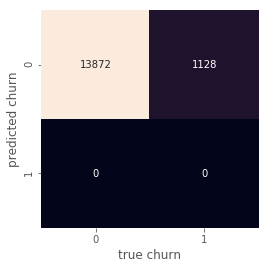

In [838]:
from sklearn.metrics import confusion_matrix

y1_predicted = model.predict(X_test)

mat = confusion_matrix(y1_test, y1_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true churn')
plt.ylabel('predicted churn')

In [819]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y1_train,X_train)
#result=logit_model.fit()
#print(result.summary())

In [770]:
# AUC
#y1_test.loc[y1_test['Churn'] < 0,'Churn'] = 0
#y1_predicted[y1_predicted < 0] = 0

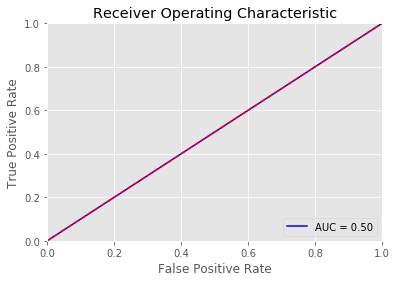

In [839]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y1_test['Churn'].values, y1_predicted)
metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [843]:
y1_train['Churn'].sum()

-29912